### Import flight table

In [11]:
#import psycopg2
import pandas as pd
import APIkey
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
pwd = APIkey.progre_key["password"]

In [6]:
con = psycopg2.connect(database="mid_term_project", user="lhl_student", password=pwd, host="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com", port="5432")

In [13]:
sql = "select fl_date,op_unique_carrier,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_delay,crs_arr_time,arr_delay,cancelled,cancellation_code,crs_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,mkt_carrier,mkt_carrier_fl_num,origin,origin_city_name,dest,dest_city_name from flights where fl_date between '2019-11-01' and '2019-11-07' "

In [14]:
df_flight = pd.read_sql_query(sql,con) 

In [17]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153720 entries, 0 to 153719
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              153720 non-null  object 
 1   op_unique_carrier    153720 non-null  object 
 2   op_carrier_fl_num    153720 non-null  int64  
 3   origin_airport_id    153720 non-null  int64  
 4   dest_airport_id      153720 non-null  int64  
 5   crs_dep_time         153720 non-null  int64  
 6   dep_delay            152989 non-null  float64
 7   crs_arr_time         153720 non-null  int64  
 8   arr_delay            152741 non-null  float64
 9   cancelled            153720 non-null  float64
 10  cancellation_code    781 non-null     object 
 11  crs_elapsed_time     153720 non-null  float64
 12  distance             153720 non-null  float64
 13  carrier_delay        18749 non-null   float64
 14  weather_delay        18749 non-null   float64
 15  nas_delay        

In [18]:
df_flight.to_csv('fl1911.csv')

In [27]:
columns = ['fl_date','op_unique_carrier','op_carrier_fl_num','origin_airport_id','dest_airport_id','crs_dep_time','dep_delay','crs_arr_time','arr_delay','cancelled','cancellation_code','crs_elapsed_time','distance','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay','mkt_carrier','mkt_carrier_fl_num','origin','dest']

### Exploratory analysis for flights data
total records : 15927485 

total columns: 42
tail_num  is null:     49269
delay : 3009148 


In [4]:
df_2019 = pd.read_csv('fl1911.csv')

In [32]:
top10_dep = df_2019[['origin','origin_city_name']].groupby('origin_city_name',as_index=False).count().sort_values('origin', ascending=False).head(10)

In [26]:
 top10_arr = df_2019[['dest','dest_city_name']].groupby('dest_city_name',as_index=False).count().sort_values('dest', ascending=False).head(10)

In [27]:
top10_arr

,dest_city_name,dest
62,"Chicago, IL",9493
18,"Atlanta, GA",7258
79,"Dallas/Fort Worth, TX",5956
84,"Denver, CO",5575
226,"New York, NY",5477
58,"Charlotte, NC",5031
145,"Houston, TX",4673
340,"Washington, DC",4637
192,"Los Angeles, CA",4571
306,"Seattle, WA",3579


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Chicago, IL'),
  Text(1, 0, 'Atlanta, GA'),
  Text(2, 0, 'Dallas/Fort Worth, TX'),
  Text(3, 0, 'Denver, CO'),
  Text(4, 0, 'New York, NY'),
  Text(5, 0, 'Charlotte, NC'),
  Text(6, 0, 'Houston, TX'),
  Text(7, 0, 'Washington, DC'),
  Text(8, 0, 'Los Angeles, CA'),
  Text(9, 0, 'Seattle, WA')])

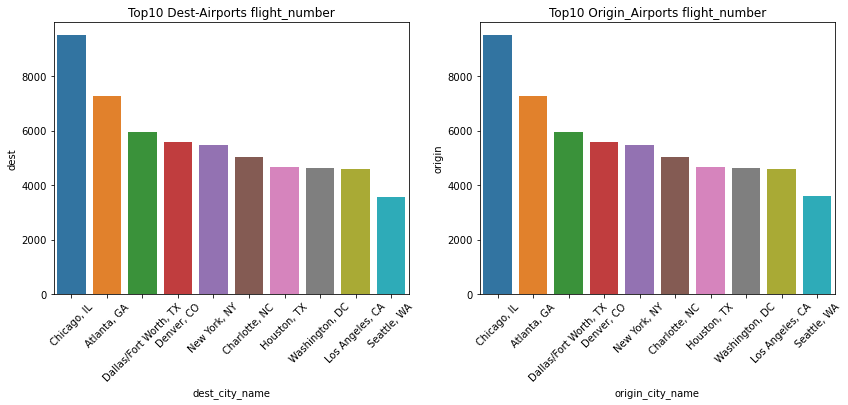

In [42]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(data=top10_arr,x='dest_city_name',y='dest',)
plt.title('Top10 Dest-Airports flight_number')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(data=top10_dep,x='origin_city_name',y='origin',)
plt.title('Top10 Origin_Airports flight_number')
plt.xticks(rotation=45)

In [36]:
top10_arr_delay = df_2019[df_2019['arr_delay'] > 0].groupby('dest_city_name',as_index=False)['arr_delay'].mean().sort_values('arr_delay', ascending=False).head(10)
top10_ori_delay = df_2019[df_2019['arr_delay'] > 0].groupby('origin_city_name',as_index=False)['arr_delay'].mean().sort_values('arr_delay', ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cheyenne, WY'),
  Text(1, 0, 'Salina, KS'),
  Text(2, 0, 'Paducah, KY'),
  Text(3, 0, 'Hays, KS'),
  Text(4, 0, 'Presque Isle/Houlton, ME'),
  Text(5, 0, 'Belleville, IL'),
  Text(6, 0, 'Lewisburg, WV'),
  Text(7, 0, 'Hilton Head, SC'),
  Text(8, 0, 'Branson, MO'),
  Text(9, 0, 'Williston, ND')])

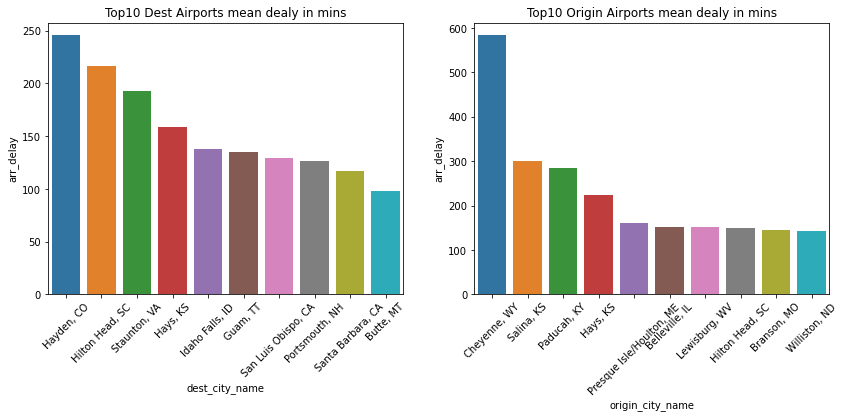

In [45]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(data=top10_arr_delay,x='dest_city_name',y='arr_delay',)
plt.title('Top10 Dest Airports mean dealy in mins')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(data=top10_ori_delay,x='origin_city_name',y='arr_delay',)
plt.title('Top10 Origin Airports mean dealy in mins')
plt.xticks(rotation=45)

In [55]:
ori_delay = df_2019[df_2019['arr_delay'] > 0].groupby('origin_city_name',as_index=False)['arr_delay'].mean()
flight_delay = df_2019[df_2019['arr_delay'] > 0].groupby('op_carrier_fl_num',as_index=False)['arr_delay'].mean()

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

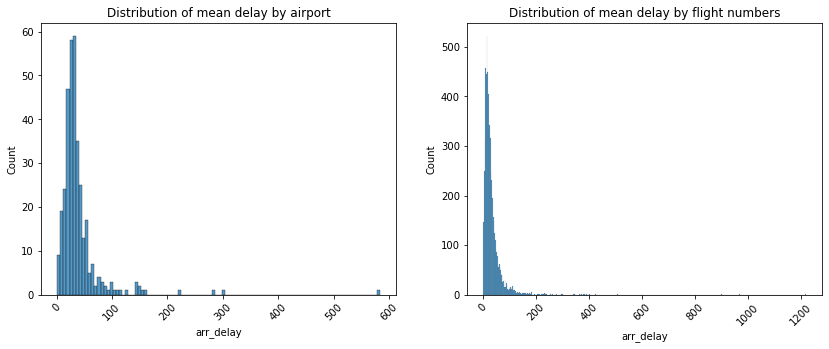

In [56]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(ori_delay['arr_delay'])
plt.title('Distribution of mean delay by airport')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.histplot(flight_delay['arr_delay'])
plt.title('Distribution of mean delay by flight numbers')
plt.xticks(rotation=45)

In [22]:
df_flights = pd.concat([df_flights,df_2019],ignore_index=True)

In [28]:
df_flights = df_flights[columns]

In [57]:
df_flights = df_2019

In [58]:
def airport_hour(t):
    '''
   conver time to hour to a new field
    '''
    t = t // 100
    if t == 24:
        t = 0
    l = '0' + str(t)
    return l[-2:]

In [59]:
df_flights['arr_hour'] = df_flights['crs_arr_time'].apply(airport_hour)
df_flights['dep_hour'] = df_flights['crs_dep_time'].apply(airport_hour)

In [60]:
df_flights['arr_key'] = df_flights['dest'] + df_flights['fl_date'] + df_flights['arr_hour']
df_flights['dep_key'] = df_flights['origin'] + df_flights['fl_date'] + df_flights['dep_hour']

In [3]:
df_sub = pd.read_csv('submit_test.csv')

In [6]:
df_sub['arr_hour'] = df_sub['crs_arr_time'].apply(airport_hour)
df_sub['dep_hour'] = df_sub['crs_dep_time'].apply(airport_hour)

In [8]:
## Generate merge keys for flight table
df_sub['arr_key'] = df_sub['dest'] + df_sub['fl_date'] + df_sub['arr_hour']
df_sub['dep_key'] = df_sub['origin'] + df_sub['fl_date'] + df_sub['dep_hour']



In [9]:
df_sub.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,dest,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,arr_hour,dep_hour,arr_key,dep_key
0,0,2020-01-01,WN,WN,5888,WN,5888,13891,ONT,"Ontario, CA",...,SFO,"San Francisco, CA",1810,1945,95,363,19,18,SFO2020-01-0119,ONT2020-01-0118
1,1,2020-01-01,WN,WN,6276,WN,6276,13891,ONT,"Ontario, CA",...,SFO,"San Francisco, CA",1150,1320,90,363,13,11,SFO2020-01-0113,ONT2020-01-0111
2,2,2020-01-01,WN,WN,4598,WN,4598,13891,ONT,"Ontario, CA",...,SJC,"San Jose, CA",2020,2130,70,333,21,20,SJC2020-01-0121,ONT2020-01-0120
3,3,2020-01-01,WN,WN,4761,WN,4761,13891,ONT,"Ontario, CA",...,SJC,"San Jose, CA",1340,1455,75,333,14,13,SJC2020-01-0114,ONT2020-01-0113
4,4,2020-01-01,WN,WN,5162,WN,5162,13891,ONT,"Ontario, CA",...,SJC,"San Jose, CA",915,1035,80,333,10,09,SJC2020-01-0110,ONT2020-01-0109


In [19]:
df_flights = df_sub

##  Weather API

In [55]:
df_weath = pd.read_csv('weather1801.csv')

In [56]:
df_weath = pd.concat([df_weath,df_weath19],ignore_index=True)

In [59]:
w_col = ['station', 'date', 'hour', 'tmpf', 'sknt', 'vsby', 'gust', 'skyl1', 'ice_accretion_3hr']

In [18]:
df_weath.head()

,station,date,hour,tmpf,sknt,vsby,gust,skyl1,ice_accretion_3hr,key
0,CLT,2020-01-01,00,48.9,11.0,10.0,0.0,0.0,0.0,CLT2020-01-0100
1,CLT,2020-01-01,01,48.0,11.0,10.0,16.0,0.0,0.0,CLT2020-01-0101
2,CLT,2020-01-01,02,45.0,8.0,10.0,0.0,0.0,0.0,CLT2020-01-0102
3,CLT,2020-01-01,03,42.1,6.0,10.0,0.0,0.0,0.0,CLT2020-01-0103
4,CLT,2020-01-01,04,42.1,8.0,10.0,0.0,0.0,0.0,CLT2020-01-0104


In [61]:
df_weath = pd.read_csv('weather201911.csv')

In [62]:
df_weath.drop(columns=['Unnamed: 0'],inplace=True)

In [63]:
def add_hour(t):
    '''
   conver time to hour to a new field
    '''
    l = '0' + str(t)
    return l[-2:]

In [64]:
df_weath['hour'] = df_weath['hour'].apply(add_hour)

In [65]:
df_weath['key'] = df_weath['station'] + df_weath['date'] + df_weath['hour']

## Combine flight and weather

In [66]:
## Merge flight table with weather table 
df_combine = pd.merge(df_flights,df_weath,left_on='dep_key',right_on='key',suffixes=('','_dep'))
df_combine = pd.merge(df_combine,df_weath,left_on='arr_key',right_on='key',suffixes=('','_arr'))


In [67]:
df_combine.drop(columns=['station_arr','date_arr','hour_arr','key_arr','station','date','hour','key'],inplace=True)

In [ ]:
df_combine = de_

In [68]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147051 entries, 0 to 147050
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             147051 non-null  int64  
 1   fl_date                147051 non-null  object 
 2   op_unique_carrier      147051 non-null  object 
 3   op_carrier_fl_num      147051 non-null  int64  
 4   origin_airport_id      147051 non-null  int64  
 5   dest_airport_id        147051 non-null  int64  
 6   crs_dep_time           147051 non-null  int64  
 7   dep_delay              146354 non-null  float64
 8   crs_arr_time           147051 non-null  int64  
 9   arr_delay              146132 non-null  float64
 10  cancelled              147051 non-null  float64
 11  cancellation_code      739 non-null     object 
 12  crs_elapsed_time       147051 non-null  float64
 13  distance               147051 non-null  float64
 14  carrier_delay          17806 non-nul

In [69]:
df_combine.to_csv('fl_wea_201911.csv')

In [70]:
df_train, df_test = train_test_split(df_combine,test_size=0.2 )

In [71]:
df_train.to_csv('fl_wea_train.csv')

In [72]:
df_test.to_csv('fl_wea_test.csv')

### separate train data with needed features. data preparation. 

In [42]:

df_train = df_flight[['fl_date','op_unique_carrier','tail_num','op_carrier_fl_num','origin_airport_id','dest_airport_id','crs_dep_time','crs_arr_time','crs_elapsed_time','distance']]

In [58]:
df_train.isnull().sum()

fl_date                  0
op_unique_carrier        0
tail_num             49269
op_carrier_fl_num        0
origin_airport_id        0
dest_airport_id          0
crs_dep_time             0
crs_arr_time             0
crs_elapsed_time        20
distance                 0
dtype: int64

In [94]:
df_train.tail()

,fl_date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance
15927480,2018-04-02,WN,N8632A,1833,12892,10821,1320,2130,310.0,2329.0
15927481,2018-04-02,WN,N8329B,1839,12892,10821,1025,1835,310.0,2329.0
15927482,2018-04-02,WN,N255WN,31,12892,11259,825,1325,180.0,1246.0
15927483,2018-04-02,WN,N786SW,1336,12892,11259,1815,2315,180.0,1246.0
15927484,2018-04-02,WN,N962WN,1436,12892,11259,510,1010,180.0,1246.0


In [96]:
# 'op_carrier_fl_num' and 'op_unique_carrier' identified unique flight
df_train[(df_train['op_carrier_fl_num'] == 1833) & (df_train['op_unique_carrier']=='WN')]

,fl_date,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance
20240,2018-04-03,WN,N8306H,1833,12892,10821,1320,2130,310.0,2329.0
35656,2018-04-04,WN,N8563Z,1833,12892,10821,1320,2130,310.0,2329.0
61654,2018-04-05,WN,N8647A,1833,12892,10821,1320,2130,310.0,2329.0
80084,2018-04-06,WN,N8683D,1833,12892,10821,1320,2130,310.0,2329.0
148279,2018-04-09,WN,N8526W,1833,13198,10397,940,1240,120.0,692.0
...,...,...,...,...,...,...,...,...,...,...
15826566,2018-09-27,WN,N441WN,1833,12889,10140,850,1120,90.0,486.0
15838195,2018-09-28,WN,N943WN,1833,12889,10140,850,1120,90.0,486.0
15849389,2018-09-28,WN,N419WN,1833,11066,12889,655,810,255.0,1771.0
15907659,2018-04-01,WN,N8677A,1833,12892,10821,1320,2130,310.0,2329.0


In [71]:
df_train.nunique()

fl_date               730
op_unique_carrier      28
tail_num             6487
op_carrier_fl_num    7252
origin_airport_id     376
dest_airport_id       376
crs_dep_time         1412
crs_arr_time         1437
crs_elapsed_time      693
distance             1623
dtype: int64

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927485 entries, 0 to 15927484
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fl_date            object 
 1   op_unique_carrier  object 
 2   tail_num           object 
 3   op_carrier_fl_num  int64  
 4   origin_airport_id  int64  
 5   dest_airport_id    int64  
 6   crs_dep_time       int64  
 7   crs_arr_time       int64  
 8   crs_elapsed_time   float64
 9   distance           float64
dtypes: float64(2), int64(5), object(3)
memory usage: 1.2+ GB


In [100]:
df_train2 = df_train.iloc[:1000000,:]

In [101]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   fl_date              1000000 non-null  object 
 1   op_unique_carrier    1000000 non-null  object 
 2   tail_num             998428 non-null   object 
 3   op_carrier_fl_num    1000000 non-null  int64  
 4   origin_airport_id    1000000 non-null  int64  
 5   dest_airport_id      1000000 non-null  int64  
 6   crs_dep_time         1000000 non-null  int64  
 7   dep_delay            986911 non-null   float64
 8   crs_arr_time         1000000 non-null  int64  
 9   arr_delay            984307 non-null   float64
 10  cancelled            1000000 non-null  float64
 11  cancellation_code    12748 non-null    object 
 12  crs_elapsed_time     1000000 non-null  float64
 13  distance             1000000 non-null  float64
 14  carrier_delay        180344 non-null   float64
 15 

In [102]:
X_train, X_test = train_test_split(df, test_size=0.2) 

In [ ]:
y_test.to_csv('y_test')

## Lable data with all delays, data preparation.

In [66]:
#df_lable['total_delay'] = df_lable['carrier_delay'] + df_lable['weather_delay'] + df_lable['nas_delay'] + df_lable['security_delay'] + df_lable['late_aircraft_delay'] + df_lable['arr_delay'] + df_lable['dep_delay']

In [59]:
def is_delay(x):
    '''
    Generate a column to identify delay.
    input : total_delay
    output : bool 1 is delay, 0 is not.
    '''
    if x > 0:
        return 1
    else: 
        return 0

In [65]:
#df_lable['isdelay'] = df_lable['total_delay'].apply(is_delay)

In [64]:
df_lable['isdelay'].value_counts()

0    12918338
1     3009148
Name: isdelay, dtype: int64

### Analyze outliners of arr_delay

In [69]:
df_lable.describe()

,dep_delay,arr_delay,cancelled,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total_delay,isdelay
count,1.566373e+07,1.561574e+07,1.592748e+07,3.009484e+06,3.009484e+06,3.009484e+06,3.009484e+06,3.009484e+06,3.009149e+06,1.592749e+07
mean,1.054971e+01,5.475932e+00,1.690210e-02,2.037512e+01,3.674443e+00,1.623685e+01,8.853279e-02,2.729212e+01,1.983783e+02,1.889280e-01
std,4.780636e+01,4.987401e+01,1.289047e-01,6.320810e+01,3.111776e+01,3.775392e+01,3.135871e+00,5.334582e+01,2.627431e+02,3.914514e-01
min,-1.280000e+03,-1.290000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.700000e+01,0.000000e+00
25%,-6.000000e+00,-1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.700000e+01,0.000000e+00
50%,-2.000000e+00,-6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,1.180000e+02,0.000000e+00
75%,7.000000e+00,8.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.300000e+01,2.330000e+02,0.000000e+00
max,2.976000e+03,2.973000e+03,1.000000e+00,2.973000e+03,2.900000e+03,1.848000e+03,1.078000e+03,2.962000e+03,8.922000e+03,1.000000e+00


In [78]:
low_3st = 5.4759 - 49.874 * 3
high_3st = 5.4759 + 49.874 * 3
IQR = 8-(-15)
low_15IQR = -15-IQR*3
high_15IQR = 8 + IQR *3
print(low_3st,low_15IQR,high_3st,high_15IQR)

-144.14610000000002 -84 155.0979 77


In [79]:
y = df_lable['arr_delay']

In [83]:
print(sum(y > high_3st),sum(y < low_3st), sum(y < low_15IQR))

253077 54 117


In [89]:
sum(y>180)

185328

(array([3.000000e+00, 5.000000e+00, 3.000000e+00, 7.000000e+00,
        7.000000e+00, 2.500000e+01, 3.400000e+01, 4.700000e+01,
        7.400000e+01, 8.800000e+01, 2.130000e+02, 3.600000e+02,
        5.970000e+02, 6.410000e+02, 1.362000e+03, 2.346000e+03,
        3.854000e+03, 6.594000e+03, 6.899000e+03, 1.628100e+04,
        2.824600e+04, 4.861000e+04, 4.989000e+04, 1.162770e+05,
        1.894140e+05, 3.021140e+05, 4.648000e+05, 4.259900e+05,
        8.422520e+05, 1.095522e+06, 1.298239e+06, 9.209080e+05,
        1.374668e+06, 1.255119e+06, 1.073661e+06, 8.848170e+05,
        4.851640e+05, 6.047350e+05, 4.868690e+05, 3.955990e+05,
        2.238200e+05, 2.877510e+05, 2.425310e+05, 2.067980e+05,
        1.788400e+05, 1.054410e+05, 1.432280e+05, 1.261540e+05,
        1.130550e+05, 6.869800e+04, 9.489000e+04, 8.588100e+04,
        7.874200e+04, 7.171400e+04, 4.458500e+04, 6.266800e+04,
        5.798700e+04, 5.371500e+04, 5.010400e+04, 3.137700e+04,
        4.457600e+04, 4.184100e+04, 3.91

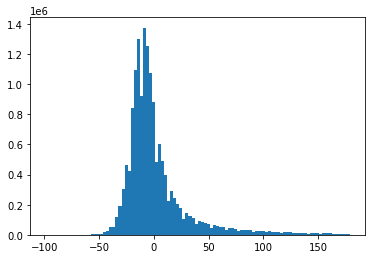

In [85]:
plt.hist(y[(y<180) & (y>-100)],bins=100)

### Table **flights_test**

total number of records: 660556
total columns: 20
fl_date: 2020-1-1 to 2020-01-31
crs_elapsed_time mean : 144.95
distance mean: 795


In [6]:
sql = 'select * from flights_test limit 100'

In [7]:
df_test = pd.read_sql(sql,con)

NameError: name 'con' is not defined

In [5]:
df_test.info()

NameError: name 'df_test' is not defined

In [30]:
df_test

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333
